In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [39]:
import warnings
warnings.filterwarnings('ignore')   
sns.set(style='whitegrid')

In [40]:
df=pd.read_csv('AIML Dataset.csv')
df.head(5)  # Display the first 5 rows of the DataFrame

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [42]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.13)

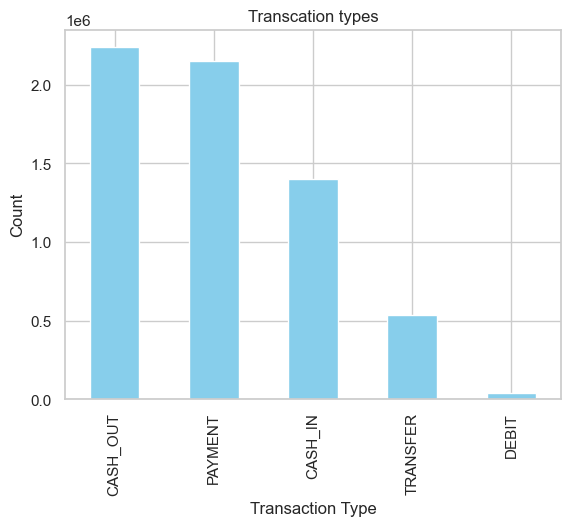

In [43]:
df["type"].value_counts().plot(kind='bar',title="Transcation types", color='skyblue')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

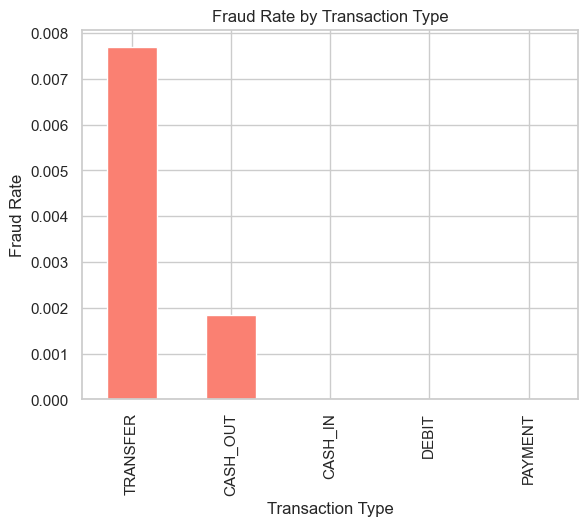

In [44]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title='Fraud Rate by Transaction Type', color="salmon")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Rate")
plt.show()

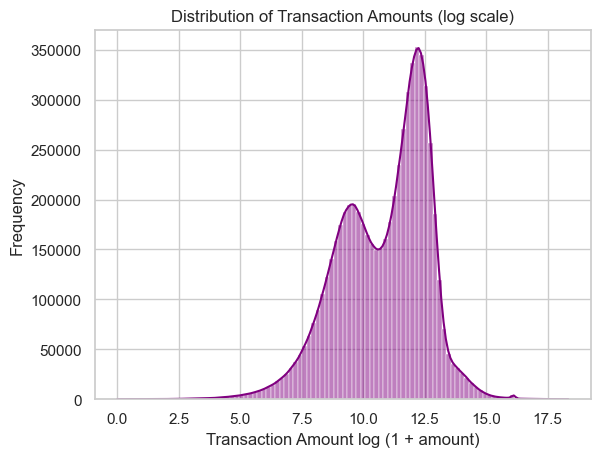

In [45]:
sns.histplot(np.log1p(df['amount']), bins=100, kde=True, color='purple')
plt.title('Distribution of Transaction Amounts (log scale)')
plt.xlabel('Transaction Amount log (1 + amount)')        
plt.ylabel('Frequency')
plt.show()

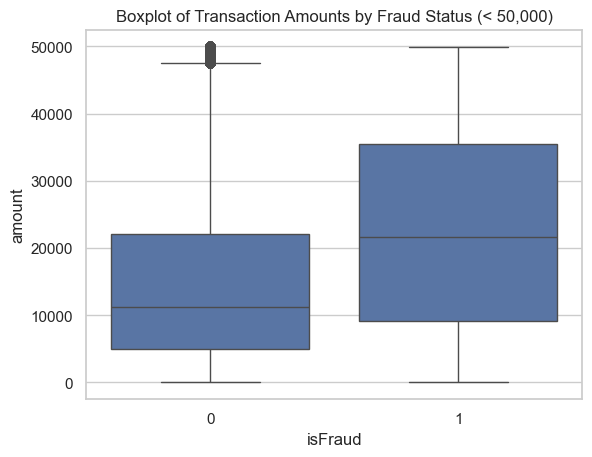

In [46]:
sns.boxplot(data=df[df["amount"] < 50000], x="isFraud", y="amount")
plt.title('Boxplot of Transaction Amounts by Fraud Status (< 50,000)')
plt.show()

In [47]:
df["balance difference"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balance destination"]= df["oldbalanceDest"] - df["newbalanceDest"]

In [48]:
(df["balance difference"]<0).sum()


np.int64(1399253)

In [49]:
(df["balance destination"]<0).sum()

np.int64(2806464)

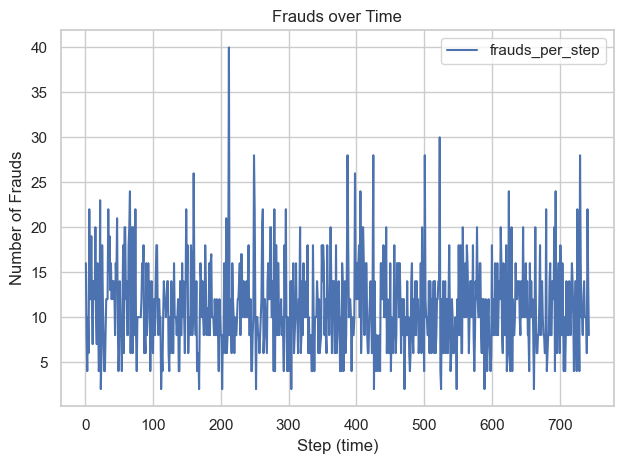

In [50]:


# Count frauds per step
frauds_per_step = df.loc[df["isFraud"] == 1].groupby("step").size().sort_index()

# Plot
plt.plot(frauds_per_step.index, frauds_per_step.values, label="frauds_per_step")
plt.xlabel("Step (time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
df.drop(columns="step", inplace=True) 

In [52]:
top_senders = df['nameOrig'].value_counts().head(10)
top_receivers = df['nameDest'].value_counts().head(10)

In [53]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [54]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [55]:
fraud_users= df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [63]:
fraud_types= df[df["type"].isin(["transfer","cash_out"])]

In [70]:
fraud_types["type"].value_counts()

Series([], Name: count, dtype: int64)

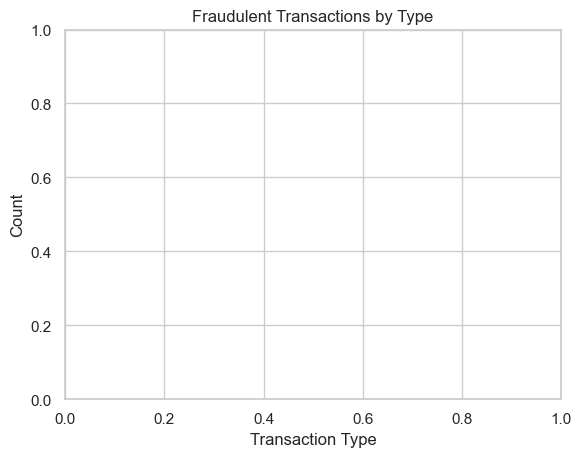

In [69]:
sns.countplot(data=fraud_types, x='type', hue='isFraud', palette='Set1')
plt.title('Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')      
plt.ylabel('Count')

plt.show()


In [72]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

In [73]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


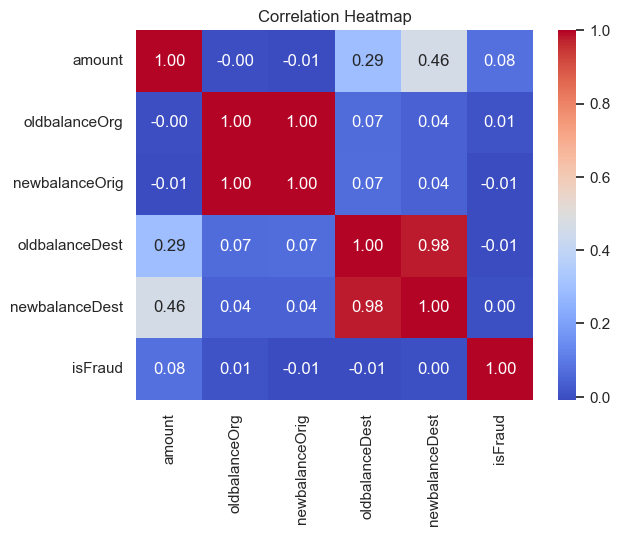

In [74]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')    
plt.show()

In [75]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [77]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance difference,balance destination
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [78]:
df_model=df.drop(columns=["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [80]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balance difference,balance destination
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [81]:
categorical=["type"]
numeric=["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [82]:
y= df_model["isFraud"]
X= df_model.drop(columns=["isFraud"], axis=1)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [86]:
preprocessor= ColumnTransformer(
    transformers=[  
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical)
    ],
    remainder='drop'
)

In [87]:
Pipeline= Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(class_weight='balanced', max_iter=1000))

])  

In [88]:
Pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [89]:
Pipeline.predict(x_test)

array([0, 0, 0, ..., 0, 1, 0])

In [90]:
y_pred = Pipeline.predict(x_test)

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [92]:
confusion_matrix(y_test, y_pred)

array([[1804747,  101575],
       [    151,    2313]])

In [93]:
Pipeline.score(x_test, y_test)

0.9467064406381858

In [95]:
import joblib
joblib.dump(Pipeline, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']